In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import Neuron
from network import Network

In [3]:
def adjust_train(train, vmin, vrescale, offset):
    return [(x - vmin) / vrescale + offset for x in train]

## Pacemakers-driven network

In [4]:
N = 50
P = 1
GC = 30000
DENSITY = .3
TMAX = 1000

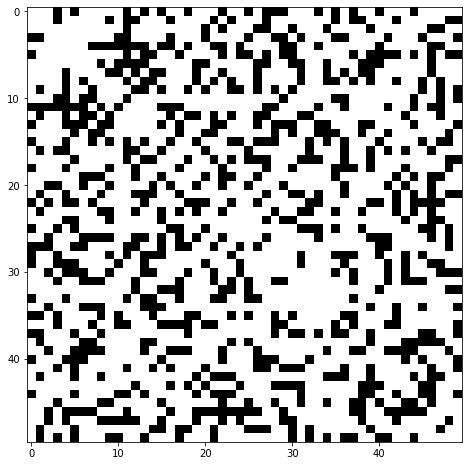

In [5]:
# define edges
edges = []
for i in range(P):
    for j in range(i+1, P):
        edges.append((i ,j))
        
for i in range(N-1):
    for j in range(i+1, N):
        if np.random.rand() < DENSITY and (i, j) not in edges:
            edges.append((i, j))
#     edges.append((i, i+1))
    
# initiate network
ntwk = Network(num=N, edges=edges, gc=GC, tmax=TMAX, pacemakers=range(P), conn_type='synapse', t_syn=.05)

# display connection matrix
ntwk.disp_conn_mat()

In [6]:
# run the simulation
ntwk.run()

100%|██████████| 99999/99999 [00:25<00:00, 3898.49it/s]


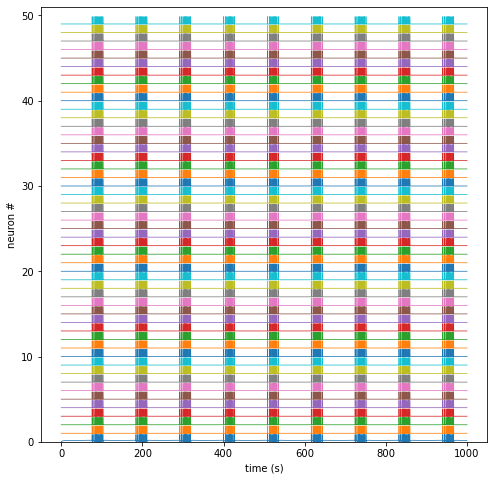

In [7]:
ntwk.disp(figsize=(8, 8), style='trace')

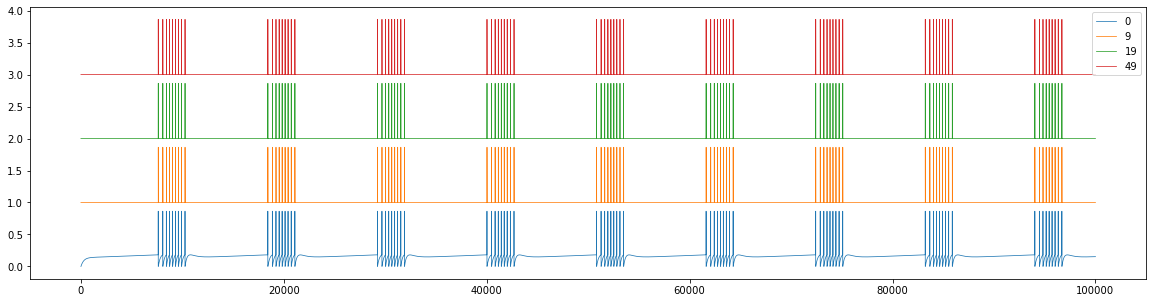

In [8]:
plt.figure(figsize=(20,5))
plt.plot(adjust_train(ntwk.neurons[0].v_train, -75, 110, 0), lw=.75, label='0')
plt.plot(adjust_train(ntwk.neurons[9].v_train, -75, 110, 1), lw=.75, label='9')
plt.plot(adjust_train(ntwk.neurons[19].v_train, -75, 110, 2), lw=.75, label='19')
plt.plot(adjust_train(ntwk.neurons[49].v_train, -75, 110, 3), lw=.75, label='49')
plt.legend()
plt.show()

## Distributed network